In [76]:
# importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [77]:
# Definindo a base de dados
dados = 'dados_produtos.csv'

In [78]:
# Lendo as informações
df = pd.read_csv(dados)

In [79]:
print(df.all)

<bound method DataFrame.all of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>


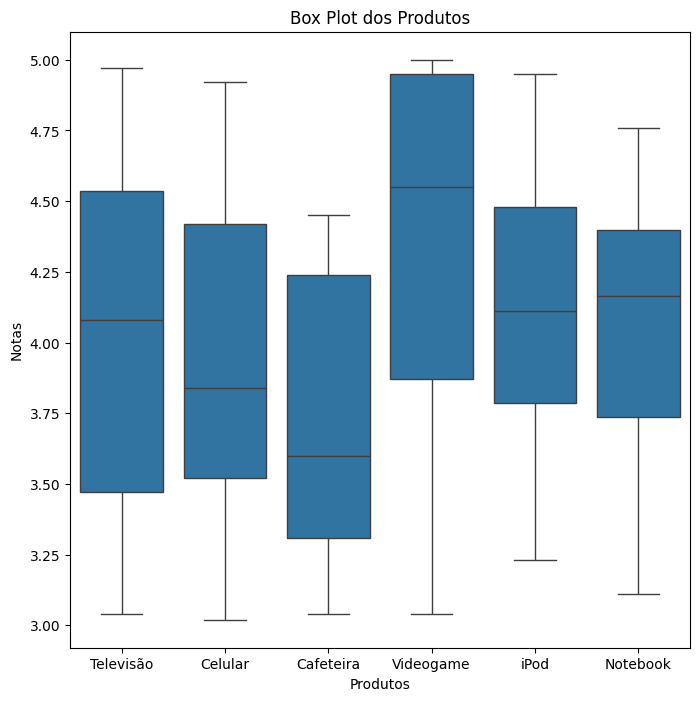

In [80]:
# Criando o box plot
plt.figure(figsize=(8, 8))
sns.boxplot(x='product_name', y='rating', data=df)
plt.title('Box Plot dos Produtos')
plt.ylabel('Notas')
plt.xlabel('Produtos')
plt.show()


In [81]:
#Informações 
df.info(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [82]:
#Visão resumida dos dados 
df.describe

<bound method NDFrame.describe of    product_name  rating  rating_count  purchased
0     Televisão    3.04            29          1
1       Celular    3.46          3872          0
2     Cafeteira    3.25          1187          0
3     Televisão    3.77          4097          1
4     Videogame    5.00          4738          1
..          ...     ...           ...        ...
95         iPod    4.44          1372          0
96      Celular    4.66          1690          1
97    Televisão    4.33          3364          1
98     Notebook    3.30          1825          1
99         iPod    4.08           533          0

[100 rows x 4 columns]>

In [83]:
#Remover dados duplicados
df = df.drop_duplicates()

In [84]:
#Remover linhas com dados faltando
df = df.dropna()

In [85]:
#Informações sobre o dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None


In [86]:
# Separar features e target
X = df[['rating', 'rating_count']]
y = df[['purchased']]

In [87]:
# Dividindo o conjunto de dados em treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

0.4 [[ 3  2]
 [10  5]]


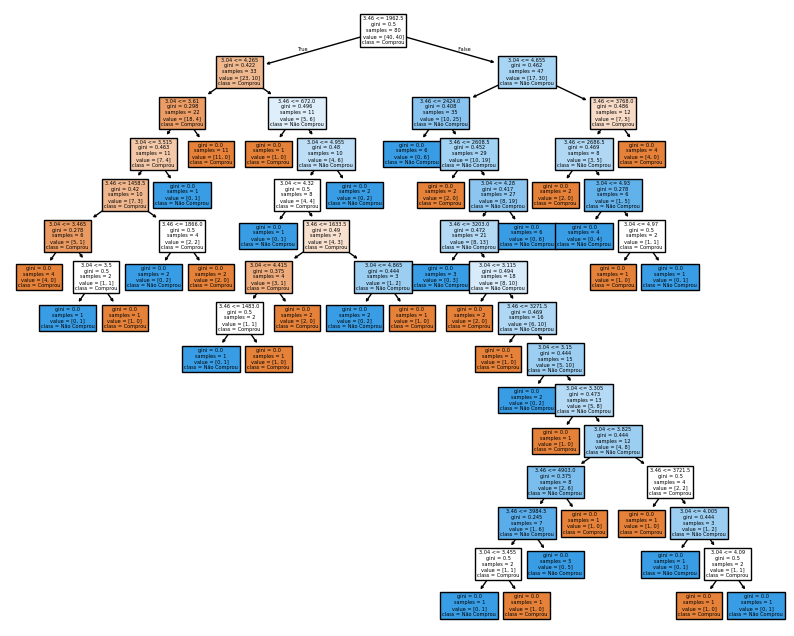

In [88]:

x=df[['rating', 'rating_count']] # pega a coluna de tempo do dataframe
y=df['purchased'] # pega a coluna de classificação do dataframe 
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
matrix = confusion_matrix(y_teste,prev)
print(acurracy, matrix)
df['purchased'] = df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=df['rating'].tolist(),class_names=df['purchased'].tolist(),filled=True)
plt.show()

In [89]:
# 
produtos = df['product_name'].unique()  # Obtém a lista de produtos únicos

for produto in produtos:
    # Filtra os dados para o produto atual
    df_produto = df[df['product_name'] == produto]
    
    if len(df_produto) == 0:  # Ignora se não houver dados para o produto
        continue
    
    x = df_produto[['rating', 'rating_count']]  # Features
    y = df_produto['purchased']  # Target variable

In [90]:
# Supondo que df já esteja definido e tenha uma coluna 'product_name'
produtos = df['product_name'].unique()  # Obtém a lista de produtos únicos

In [91]:
# Criando e ajustando o modelo
model = DecisionTreeClassifier()
model.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [92]:
# Fazendo previsões
prev = model.predict(x_teste)

In [93]:
# Avaliando o modelo
acurracy = accuracy_score(y_teste, prev)
matrix = confusion_matrix(y_teste, prev)
print(f"Produto: {produto} | Accuracy: {acurracy:.2f} | Confusion Matrix:\n{matrix}")

Produto: Notebook | Accuracy: 0.35 | Confusion Matrix:
[[ 3  2]
 [11  4]]


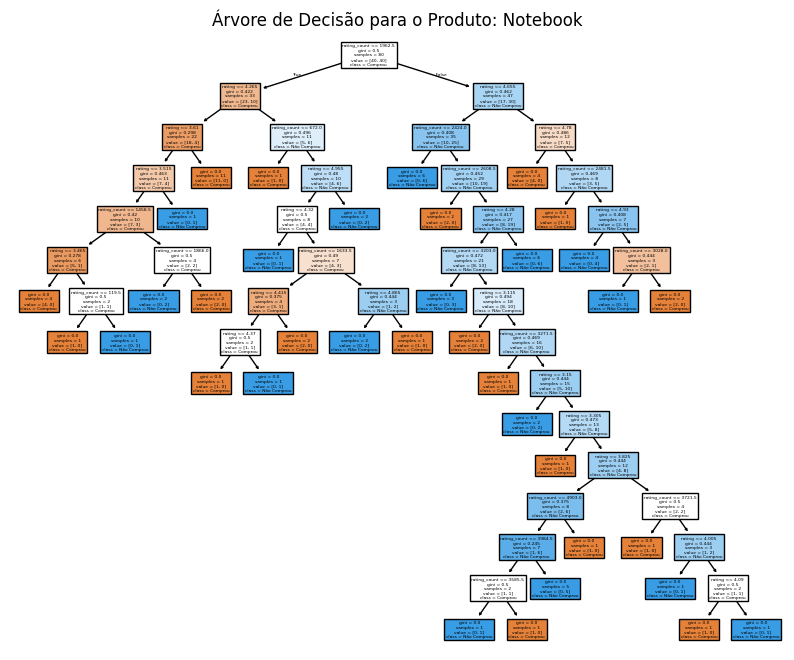

In [94]:
# Plotando a árvore de decisão
plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.columns.tolist(), class_names=['Comprou', 'Não Comprou'], filled=True)
plt.title(f'Árvore de Decisão para o Produto: {produto}')
plt.show()


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 1.0
Recall Score: 0.3333333333333333
F1 Score (macro): 0.5
F1 Score (micro): 0.5

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.5
Recall Score: 1.0
F1 Score (macro): 0.5833333333333333
F1 Score (micro): 0.6

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
F1 Score (macro): 0.3333333333333333
F1 Score (micro): 0.5

Visualização da Árvore:

--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Accuracy Sco

C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\3226796748.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\3226796748.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
C:\Users\dsadm\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py

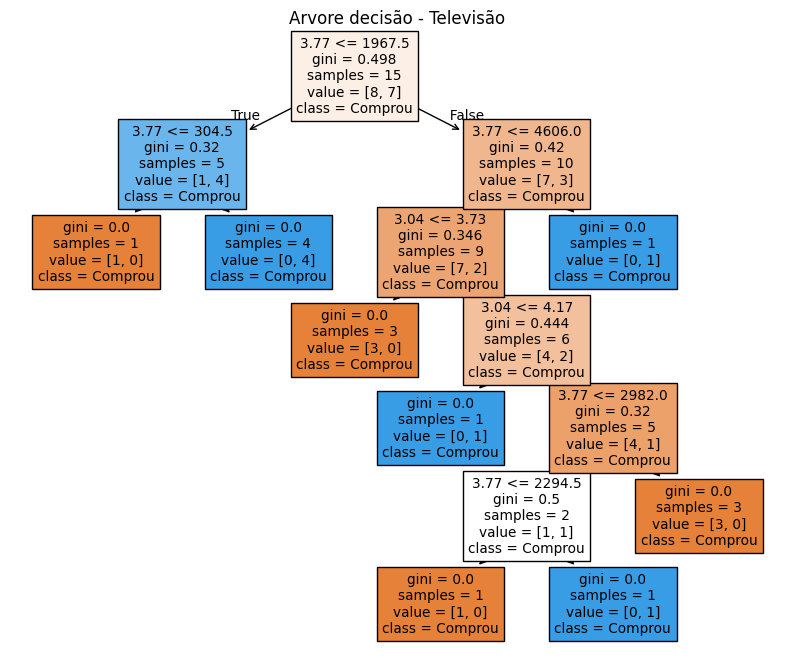

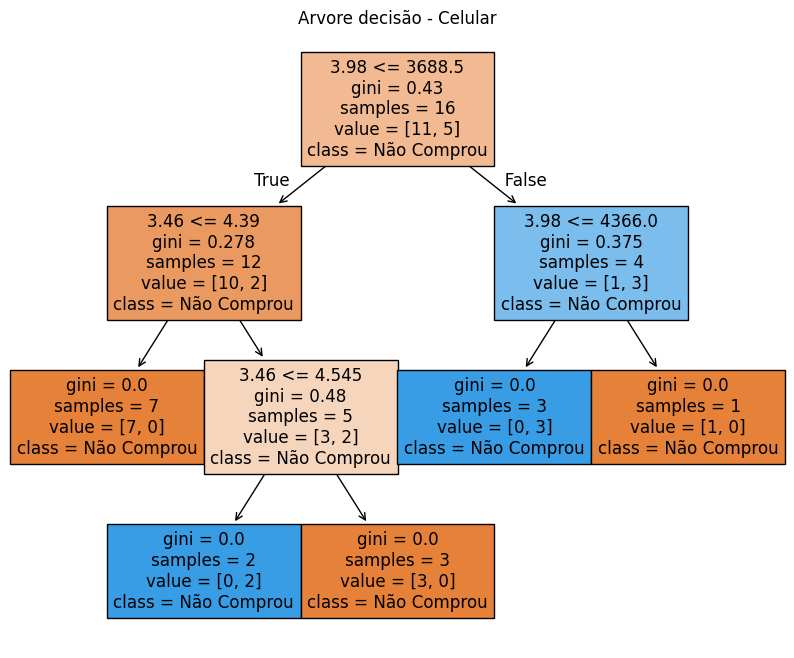

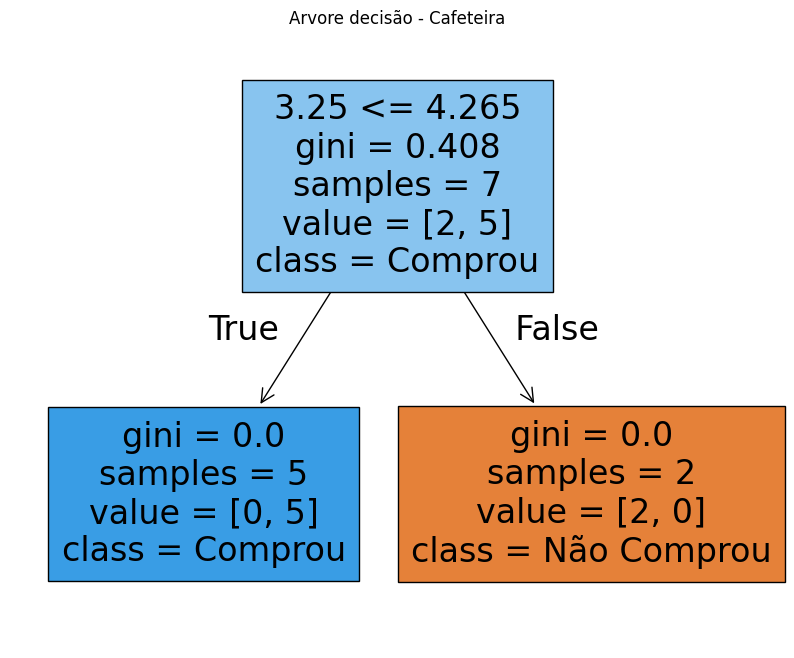

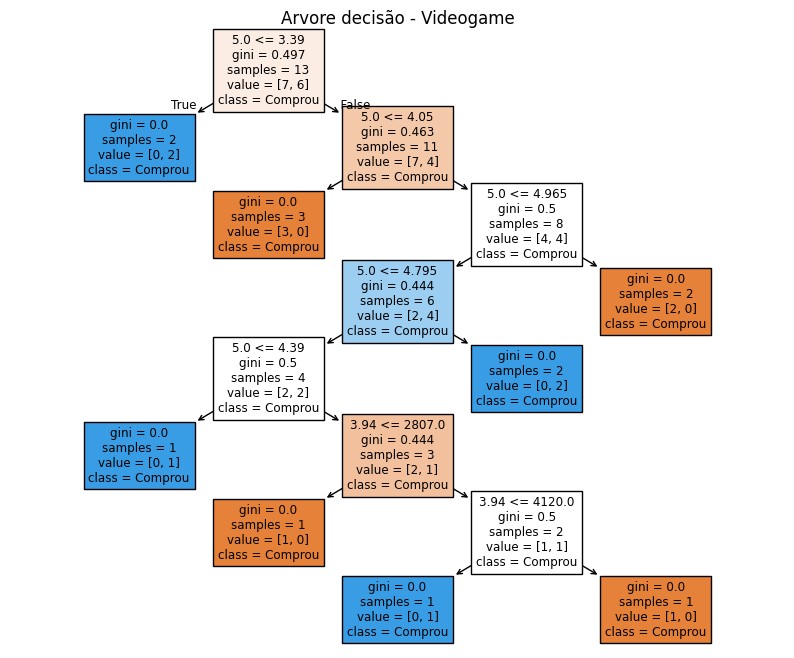

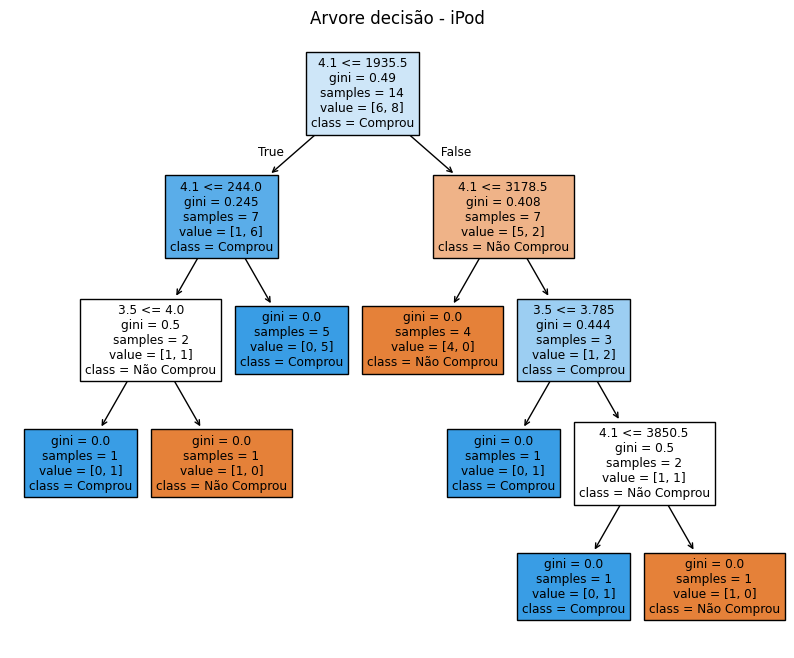

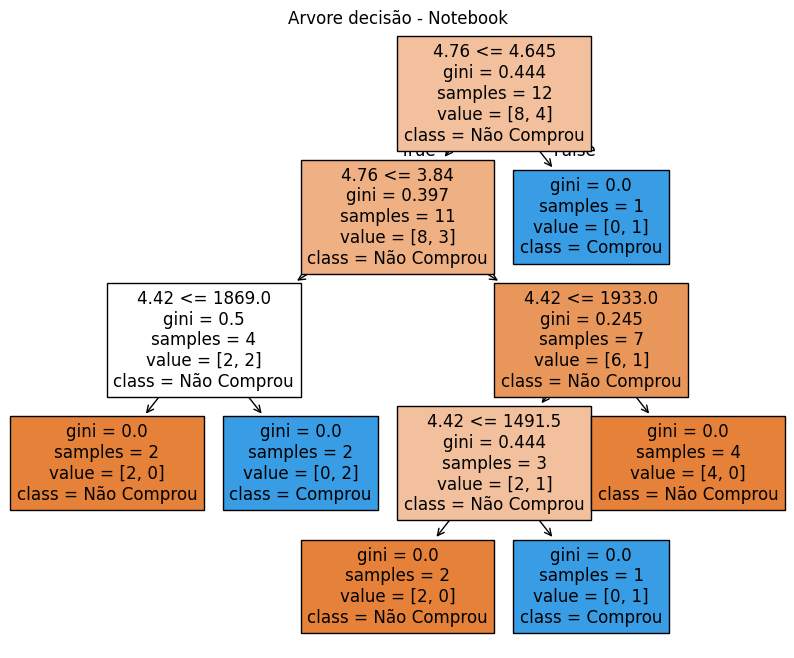

In [95]:
products = df['product_name'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = df.loc[df['product_name'] == product]

    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']

    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(x_test)

    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="Comprou")}')
    print(f'Precision Score: {precision_score(y_test, y_pred, pos_label="Comprou")}')
    print(f'Recall Score: {recall_score(y_test, y_pred, pos_label="Comprou")}')
    print(f'F1 Score (macro): {f1_score(y_test, y_pred, average="macro")}')
    print(f'F1 Score (micro): {f1_score(y_test, y_pred, average="micro")}')

    print('\nVisualização da Árvore:')

    product_df['purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    tree.plot_tree(model, feature_names=product_df['rating'].tolist(), class_names=product_df['purchased'].tolist(), filled= True)
    plt.title(f'Arvore decisão - {product}')

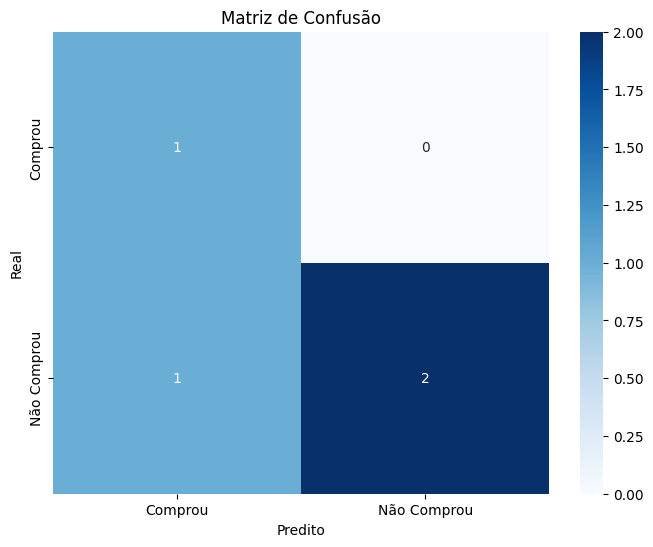

In [96]:
# Criação da matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=['Comprou', 'Não Comprou'])

# Visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Comprou', 'Não Comprou'], yticklabels=['Comprou', 'Não Comprou'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [97]:
produtos = np.unique(y_test)

In [98]:
for produto in produtos:
    precision = precision_score(y_test, y_pred, pos_label=produto, average='binary', zero_division=0)
    recall = recall_score(y_test, y_pred, pos_label=produto, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, pos_label=produto, average='binary', zero_division=0)
    
    print(f'Métricas para {produto}:')
    print(f'Precisão: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}\n')

Métricas para Comprou:
Precisão: 0.50
Recall: 1.00
F1-Score: 0.67

Métricas para Não Comprou:
Precisão: 1.00
Recall: 0.67
F1-Score: 0.80




Modelo para o produto "Televisão":
Acurácia: 0.75
Precisão: 0.88
Recall: 0.75
F1-Score: 0.77
Matriz de Confusão:
[[2 1]
 [0 1]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\523755624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)


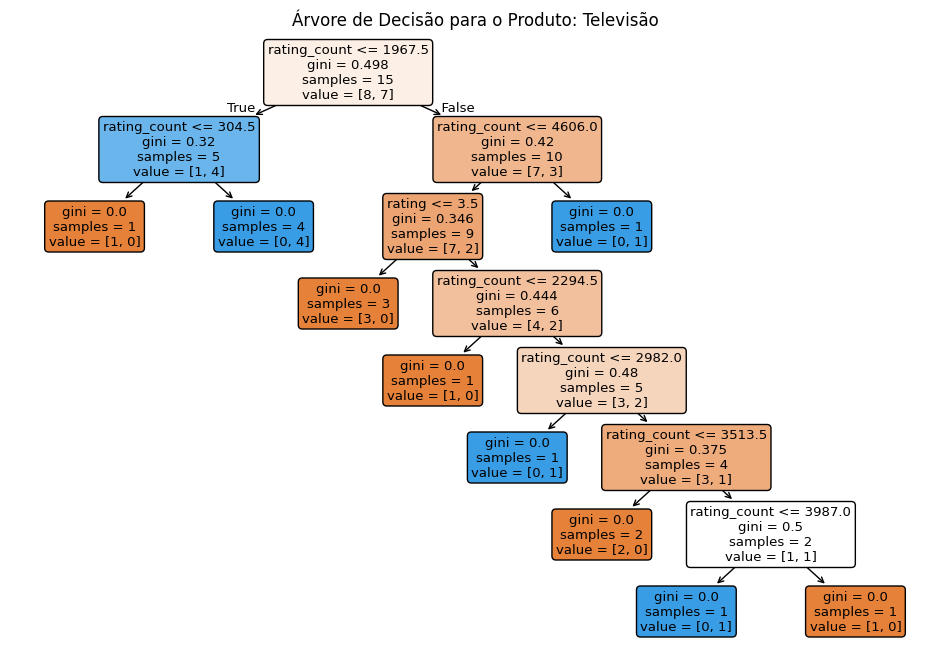

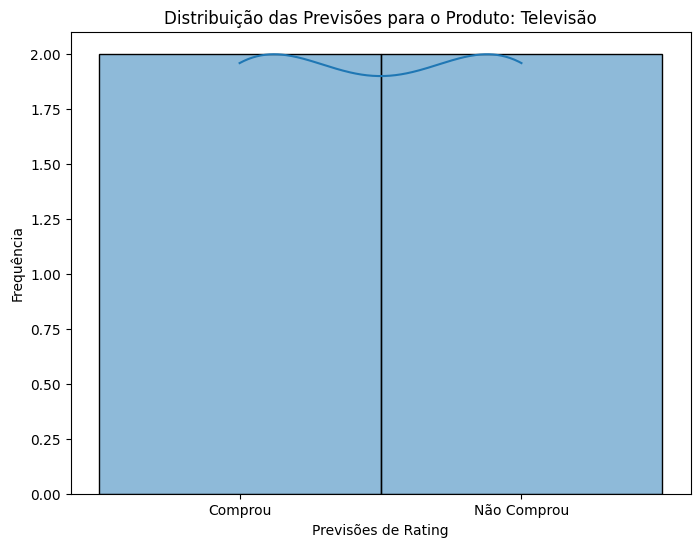


Modelo para o produto "Celular":
Acurácia: 0.60
Precisão: 0.80
Recall: 0.60
F1-Score: 0.57
Matriz de Confusão:
[[2 0]
 [2 1]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\523755624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)


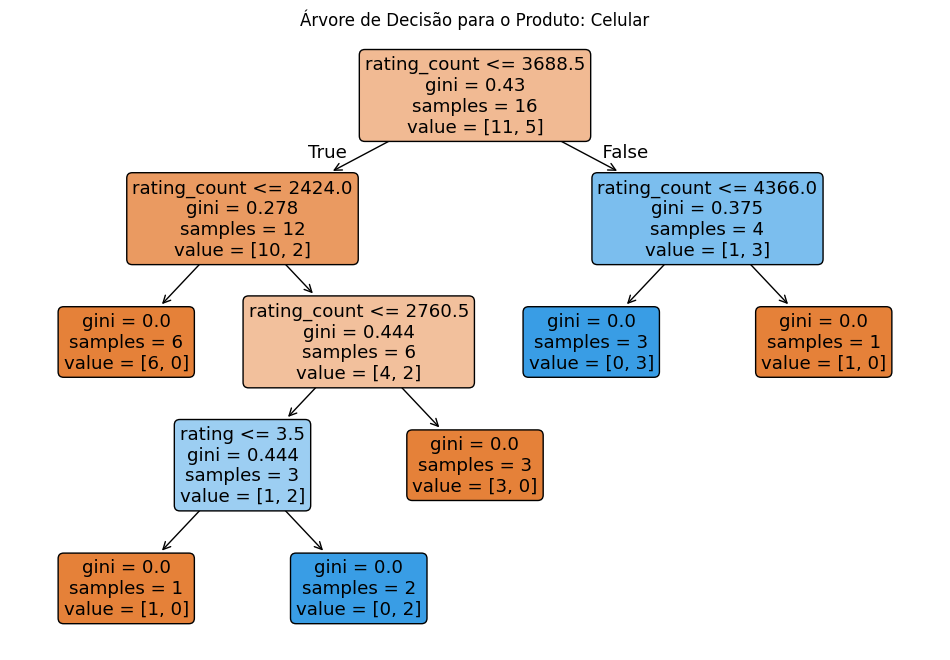

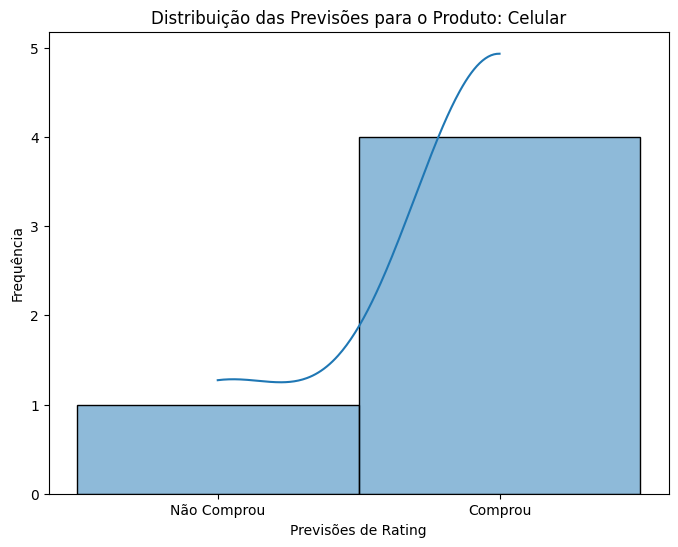


Modelo para o produto "Cafeteira":
Acurácia: 0.50
Precisão: 0.25
Recall: 0.50
F1-Score: 0.33
Matriz de Confusão:
[[0 1]
 [0 1]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\523755624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)


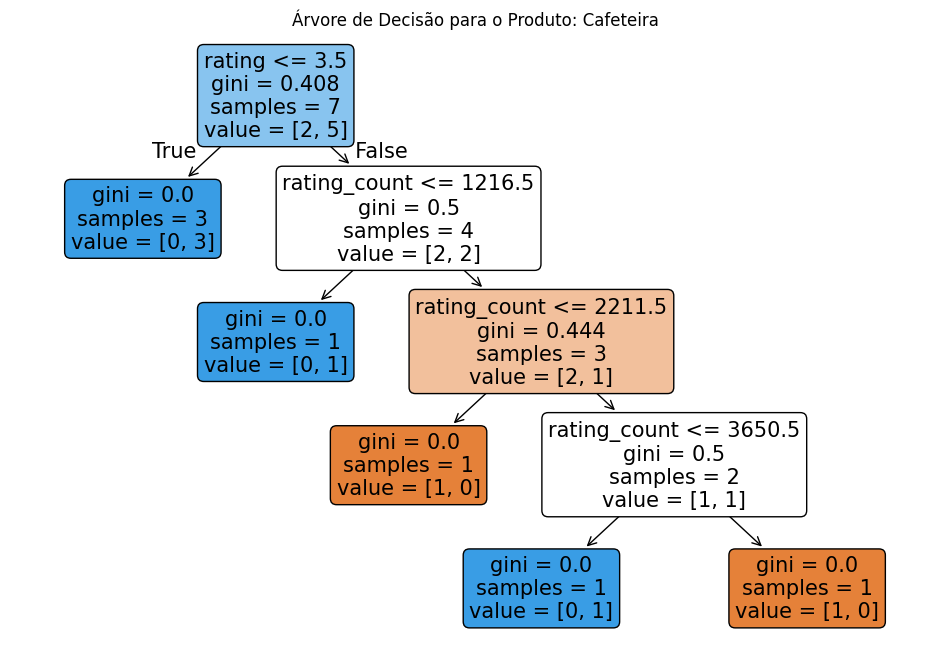

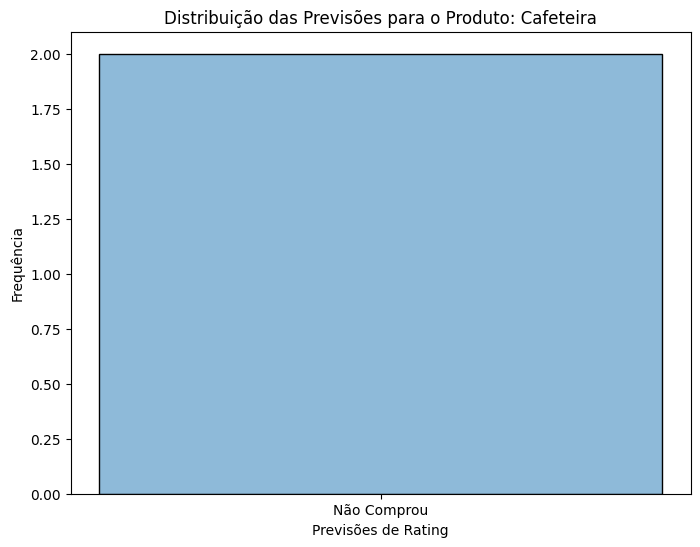


Modelo para o produto "Videogame":
Acurácia: 0.75
Precisão: 1.00
Recall: 0.75
F1-Score: 0.86
Matriz de Confusão:
[[3 1]
 [0 0]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\523755624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)


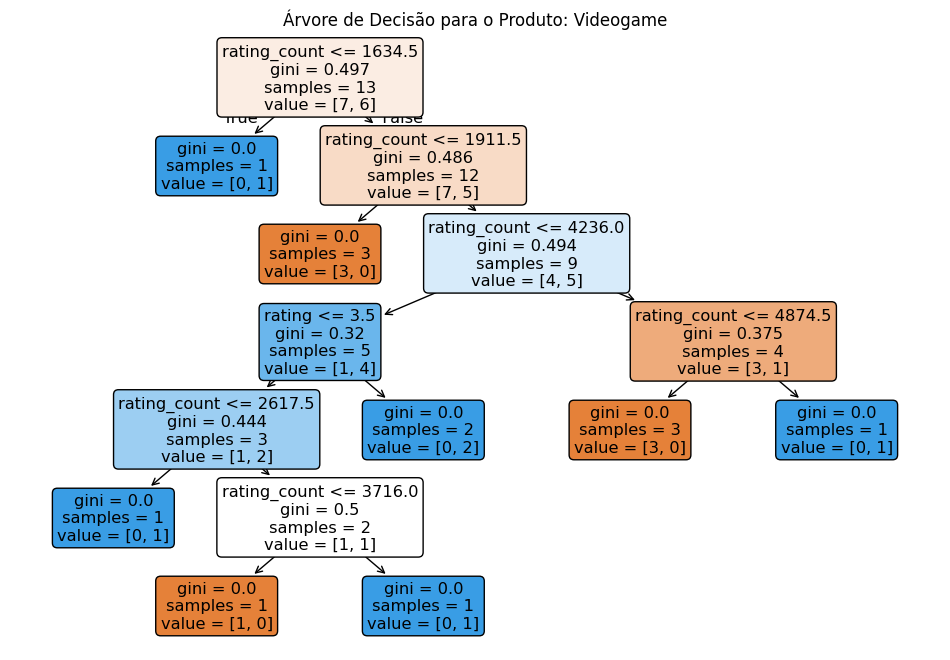

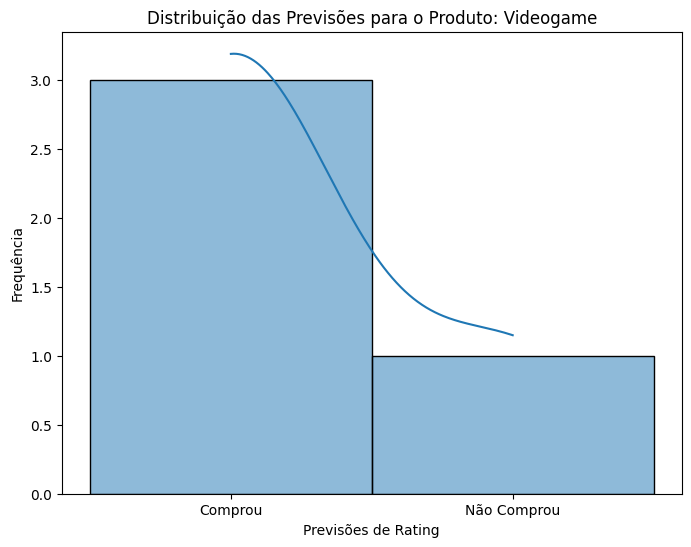


Modelo para o produto "iPod":
Acurácia: 0.25
Precisão: 0.17
Recall: 0.25
F1-Score: 0.20
Matriz de Confusão:
[[0 2]
 [1 1]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\523755624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)


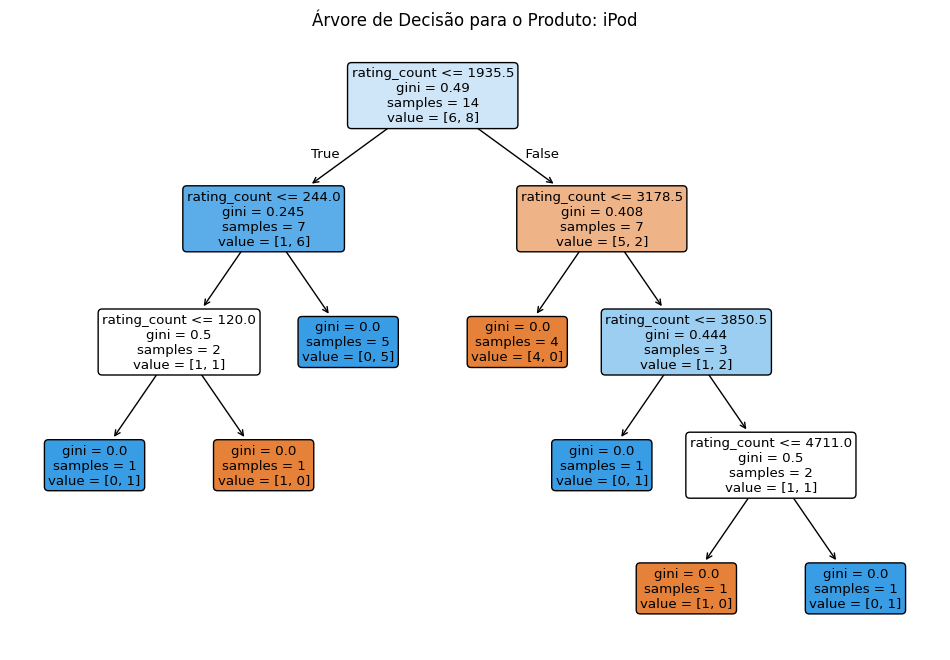

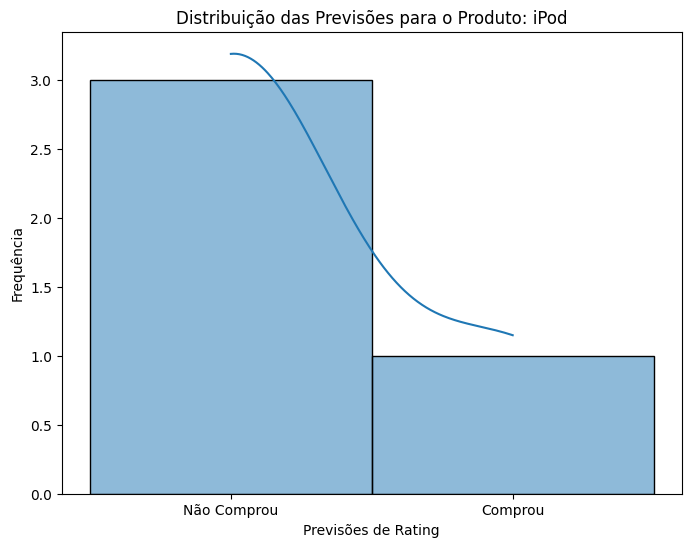


Modelo para o produto "Notebook":
Acurácia: 0.25
Precisão: 0.06
Recall: 0.25
F1-Score: 0.10
Matriz de Confusão:
[[1 0]
 [3 0]]


C:\Users\dsadm\AppData\Local\Temp\ipykernel_21204\523755624.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['rating'] = dados_produto['rating'].astype(int)


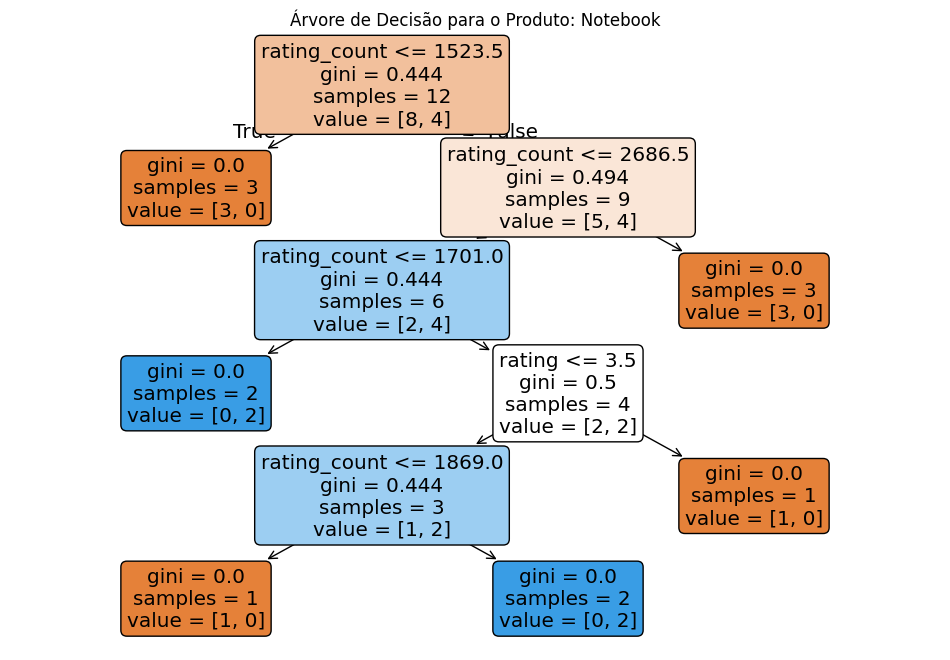

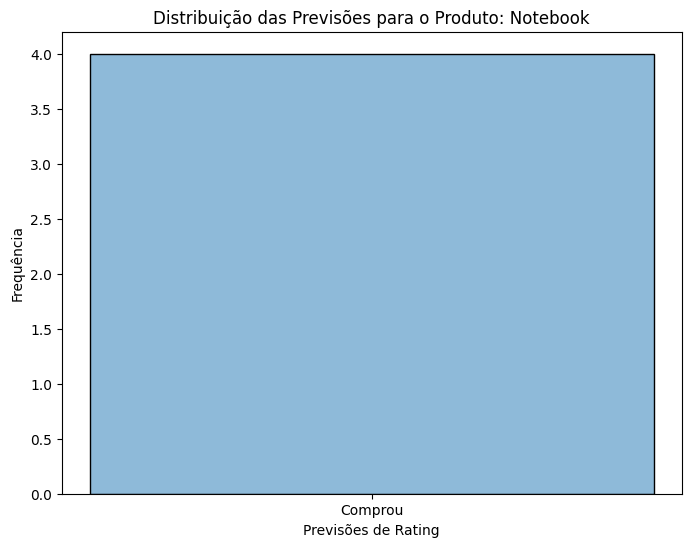

In [99]:
# Obter a lista de produtos únicos
produtos = df['product_name'].unique()

# Criar dicionário para armazenar resultados
modelos_resultados = {}

for produto in produtos:
    # Filtrar dados para o produto atual
    dados_produto = df[df['product_name'] == produto]
    
    # Verificar se há dados suficientes para treinar o modelo
    if len(dados_produto) < 5:  # Ajuste conforme necessário
        print(f"Produto '{produto}' possui dados insuficientes para treinar o modelo.")
        continue
    
    # Converter a coluna de avaliação em classes discretas
    dados_produto['rating'] = dados_produto['rating'].astype(int)

    # Definir características e variável alvo
    X = dados_produto[['rating', 'rating_count']]  # Características
    y = dados_produto['purchased']  # Variável alvo (supondo que essa coluna exista)

    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criar o modelo de árvore de decisão
    modelo = DecisionTreeClassifier(random_state=42)
    modelo.fit(X_train, y_train)

    # Fazer previsões
    y_pred = modelo.predict(X_test)

    # Calcular métricas
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Armazenar resultados
    modelos_resultados[produto] = {
        'modelo': modelo,
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

    # Exibir resultados
    print(f'\nModelo para o produto "{produto}":')
    print(f'Acurácia: {acc:.2f}')
    print(f'Precisão: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-Score: {f1:.2f}')
    print(f'Matriz de Confusão:\n{conf_matrix}')

    # Visualizar a árvore de decisão
    plt.figure(figsize=(12, 8))
    plot_tree(modelo, feature_names=['rating', 'rating_count'], filled=True, rounded=True)
    plt.title(f'Árvore de Decisão para o Produto: {produto}')
    plt.show()

    # Plotar a distribuição das previsões
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, bins=10, kde=True)
    plt.title(f'Distribuição das Previsões para o Produto: {produto}')
    plt.xlabel('Previsões de Rating')
    plt.ylabel('Frequência')
    plt.show()

In [100]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
